## Topic: What makes us happy?
### Mayoukh Dutta





## Introduction:

This project aims to see the correlation between the score of 29 countries <b>(top 10, bottom 10, BRICS)</b> on <b>the World Happiness Report</b> and six self-selected parameters.

We have taken the World Happiness Report 2023 for reference and the data for the six parameters - <b>Access to Electricity, GDP per Capita (PPP adjusted), Percentage of Total Population aged 0-14, Gross School Enrollment (Tertiary), Mean Annual Exposure to PM2.5 Air Pollution and CO2 Emissions</b> - have been taken from the <b>World Bank databank</b> (the latest data has been taken for reference).

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
#Importing the World Happiness Report data
wrld_score = pd.read_csv("world-happiness-report.csv")
wrld_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [75]:
wrld_score.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [76]:
#Making a separate dataframe from the World Happiness Report data with only the Country names, Years and the Life Ladder (Scores)
wrld_score = wrld_score[["Country name", "year", "Life Ladder"]]

#Further making another dataframe from the above dataframe with only the 2023 entries
wrld_score_2023 = wrld_score[wrld_score['year'] == 2023]
wrld_score_2023 = wrld_score_2023.sort_values(by = "Life Ladder", ascending = False)

In [77]:
wrld_score_2023.head()

,Country name,year,Life Ladder
680,Finland,2023,7.699
886,Iceland,2023,7.562
556,Denmark,2023,7.504
490,Costa Rica,2023,7.384
1498,Netherlands,2023,7.255


In [78]:
#Making three dataframes out of the filtered dataframe - top 10, bottom 10, BRICS
wrld_t10 = wrld_score_2023.head(10)
wrld_b10 = wrld_score_2023.tail(10)
wrld_score_brics = wrld_score_2023[wrld_score_2023['Country name'].isin(['India', 'Brazil', 'Russia', 'China', 'South Africa', 'Egypt', 'Ethiopia', 'Iran', 'United Arab Emirates'])]

In [79]:
#Concatenating the three dataframes and doing necessary adjustments
wrld_clean = pd.concat([wrld_t10, wrld_b10, wrld_score_brics])
wrld_clean.drop(columns = ["year"], inplace = True)
wrld_clean = wrld_clean.sort_values(by = "Life Ladder", ascending = False)
wrld_clean["Score"] = wrld_clean["Life Ladder"]
wrld_clean = wrld_clean.drop(["Life Ladder"],axis=1)
wrld_clean.reset_index(inplace = True, drop = True)

In [80]:
wrld_clean.head(29)

,Country name,Score
0,Finland,7.699
1,Iceland,7.562
2,Denmark,7.504
3,Costa Rica,7.384
4,Netherlands,7.255
5,Norway,7.249
6,Sweden,7.161
7,Kuwait,7.130
8,Australia,7.025
9,Luxembourg,7.016


In [81]:
#Importing the World Bank data
wrld_data = pd.read_csv("world-bank-data.csv")
wrld_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 7 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Country name                                                            266 non-null    object 
 1   Access to electricity (% of population)                                 263 non-null    float64
 2   GDP per capita, PPP (current international $)                           241 non-null    float64
 3   Population ages 0-14 (% of total population)                            265 non-null    float64
 4   School enrollment, tertiary (% gross)                                   156 non-null    float64
 5   PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)  248 non-null    float64
 6   CO2 emissions (kt)                                                      239 non-nul

In [82]:
wrld_data.head()

,Country name,Access to electricity (% of population),"GDP per capita, PPP (current international $)",Population ages 0-14 (% of total population),"School enrollment, tertiary (% gross)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",CO2 emissions (kt)
0,Aruba,100.000000,41195.974520,16.799407,NaN,NaN,NaN
1,Africa Eastern and Southern,48.103609,3871.098505,41.362729,8.85052,30.879069,544952.503
2,Afghanistan,97.700000,1673.144189,43.424543,NaN,52.417041,8709.470
3,Africa Western and Central,54.224187,4432.453117,43.095027,NaN,63.357373,215915.610
4,Angola,48.223854,6523.463613,45.179105,NaN,28.420810,19814.500


In [83]:
#Merging the concatenated data (World Happiness Report scores) with the World Bank data
wrld = pd.merge(wrld_clean, wrld_data, how='left', on='Country name')
wrld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 8 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Country name                                                            29 non-null     object 
 1   Score                                                                   29 non-null     float64
 2   Access to electricity (% of population)                                 29 non-null     float64
 3   GDP per capita, PPP (current international $)                           28 non-null     float64
 4   Population ages 0-14 (% of total population)                            29 non-null     float64
 5   School enrollment, tertiary (% gross)                                   17 non-null     float64
 6   PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)  29 non-null  

In [84]:
wrld.describe().round(2)

,Score,Access to electricity (% of population),"GDP per capita, PPP (current international $)",Population ages 0-14 (% of total population),"School enrollment, tertiary (% gross)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",CO2 emissions (kt)
count,29.00,29.00,28.00,29.00,17.00,29.00,29.00
mean,5.30,85.80,33390.96,26.69,60.01,28.43,601314.16
std,1.83,26.28,34168.75,10.50,33.79,20.87,2050472.60
min,1.45,14.19,1184.72,15.14,2.41,5.57,328.20
25%,3.59,87.94,6416.63,17.71,25.24,11.60,7853.10
50%,5.08,100.00,16503.09,23.21,61.56,22.35,27356.50
75%,7.13,100.00,58756.80,38.26,86.52,43.67,210752.30
max,7.70,100.00,137947.34,46.53,112.69,83.20,10944686.20


In [85]:
wrld.head(29)

,Country name,Score,Access to electricity (% of population),"GDP per capita, PPP (current international $)",Population ages 0-14 (% of total population),"School enrollment, tertiary (% gross)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",CO2 emissions (kt)
0,Finland,7.699,100.000000,57848.614170,15.428644,100.868072,5.565330,3.632990e+04
1,Iceland,7.562,100.000000,61481.366930,18.628674,86.523209,5.698616,1.446600e+03
2,Denmark,7.504,100.000000,69878.934810,16.165154,83.982292,9.785960,2.735650e+04
3,Costa Rica,7.384,100.000000,23700.294260,20.548454,NaN,17.421741,6.967400e+03
4,Netherlands,7.255,100.000000,67693.326430,15.502664,88.954262,12.039286,1.303151e+05
5,Norway,7.249,100.000000,86891.996490,16.966314,93.924301,6.642383,3.617740e+04
6,Sweden,7.161,100.000000,63375.044650,17.714028,85.942619,5.647573,3.357610e+04
7,Kuwait,7.130,100.000000,50295.282540,21.120128,61.558048,60.966480,9.230890e+04
8,Australia,7.025,100.000000,57406.178760,18.373329,112.688294,6.745498,3.789968e+05
9,Luxembourg,7.016,100.000000,137947.343900,15.913759,20.734150,10.068906,7.853100e+03


In [86]:
#Filling in the missing values with the means of the respective columns
wrld['GDP per capita, PPP (current international $)'].fillna(wrld['GDP per capita, PPP (current international $)'].mean(),  inplace=True)
wrld['Population ages 0-14 (% of total population)'].fillna(wrld['Population ages 0-14 (% of total population)'].mean(),  inplace=True)
wrld['School enrollment, tertiary (% gross)'].fillna(wrld['School enrollment, tertiary (% gross)'].mean(),  inplace=True)
wrld['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'].fillna(wrld['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'].mean(),  inplace=True)
wrld['CO2 emissions (kt)'].fillna(wrld['CO2 emissions (kt)'].mean(),  inplace=True)

In [87]:
wrld.head(29)

,Country name,Score,Access to electricity (% of population),"GDP per capita, PPP (current international $)",Population ages 0-14 (% of total population),"School enrollment, tertiary (% gross)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",CO2 emissions (kt)
0,Finland,7.699,100.000000,57848.614170,15.428644,100.868072,5.565330,3.632990e+04
1,Iceland,7.562,100.000000,61481.366930,18.628674,86.523209,5.698616,1.446600e+03
2,Denmark,7.504,100.000000,69878.934810,16.165154,83.982292,9.785960,2.735650e+04
3,Costa Rica,7.384,100.000000,23700.294260,20.548454,60.005272,17.421741,6.967400e+03
4,Netherlands,7.255,100.000000,67693.326430,15.502664,88.954262,12.039286,1.303151e+05
5,Norway,7.249,100.000000,86891.996490,16.966314,93.924301,6.642383,3.617740e+04
6,Sweden,7.161,100.000000,63375.044650,17.714028,85.942619,5.647573,3.357610e+04
7,Kuwait,7.130,100.000000,50295.282540,21.120128,61.558048,60.966480,9.230890e+04
8,Australia,7.025,100.000000,57406.178760,18.373329,112.688294,6.745498,3.789968e+05
9,Luxembourg,7.016,100.000000,137947.343900,15.913759,20.734150,10.068906,7.853100e+03


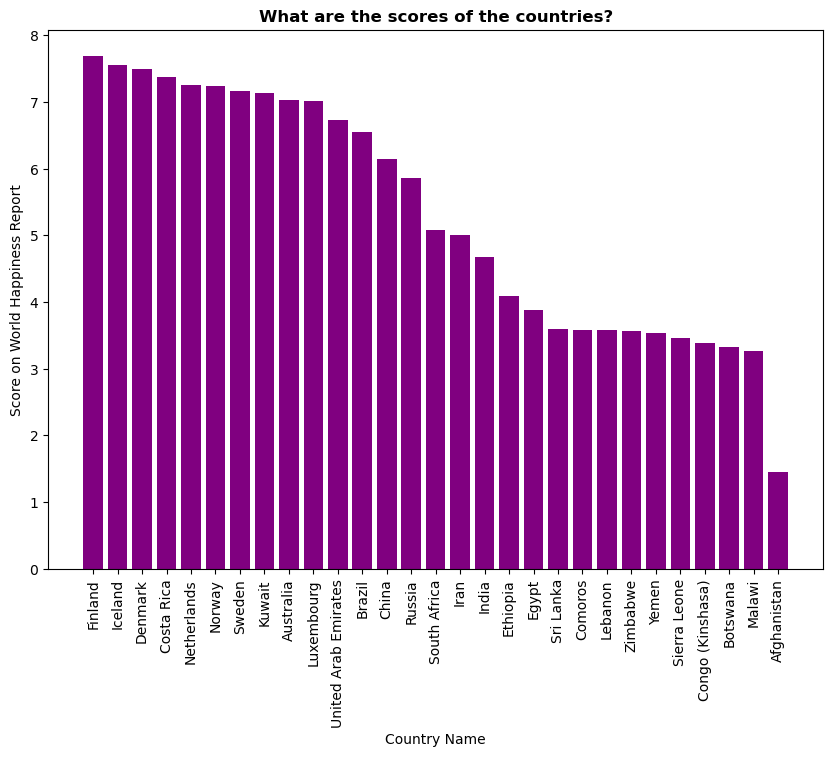

In [88]:
plt.figure(figsize=(10, 7))
plt.bar(wrld["Country name"], wrld["Score"], color='purple')
plt.xticks(rotation = 90)
plt.xlabel('Country Name')
plt.ylabel('Score on World Happiness Report')
plt.title('What are the scores of the countries?', fontweight="bold")
plt.show()

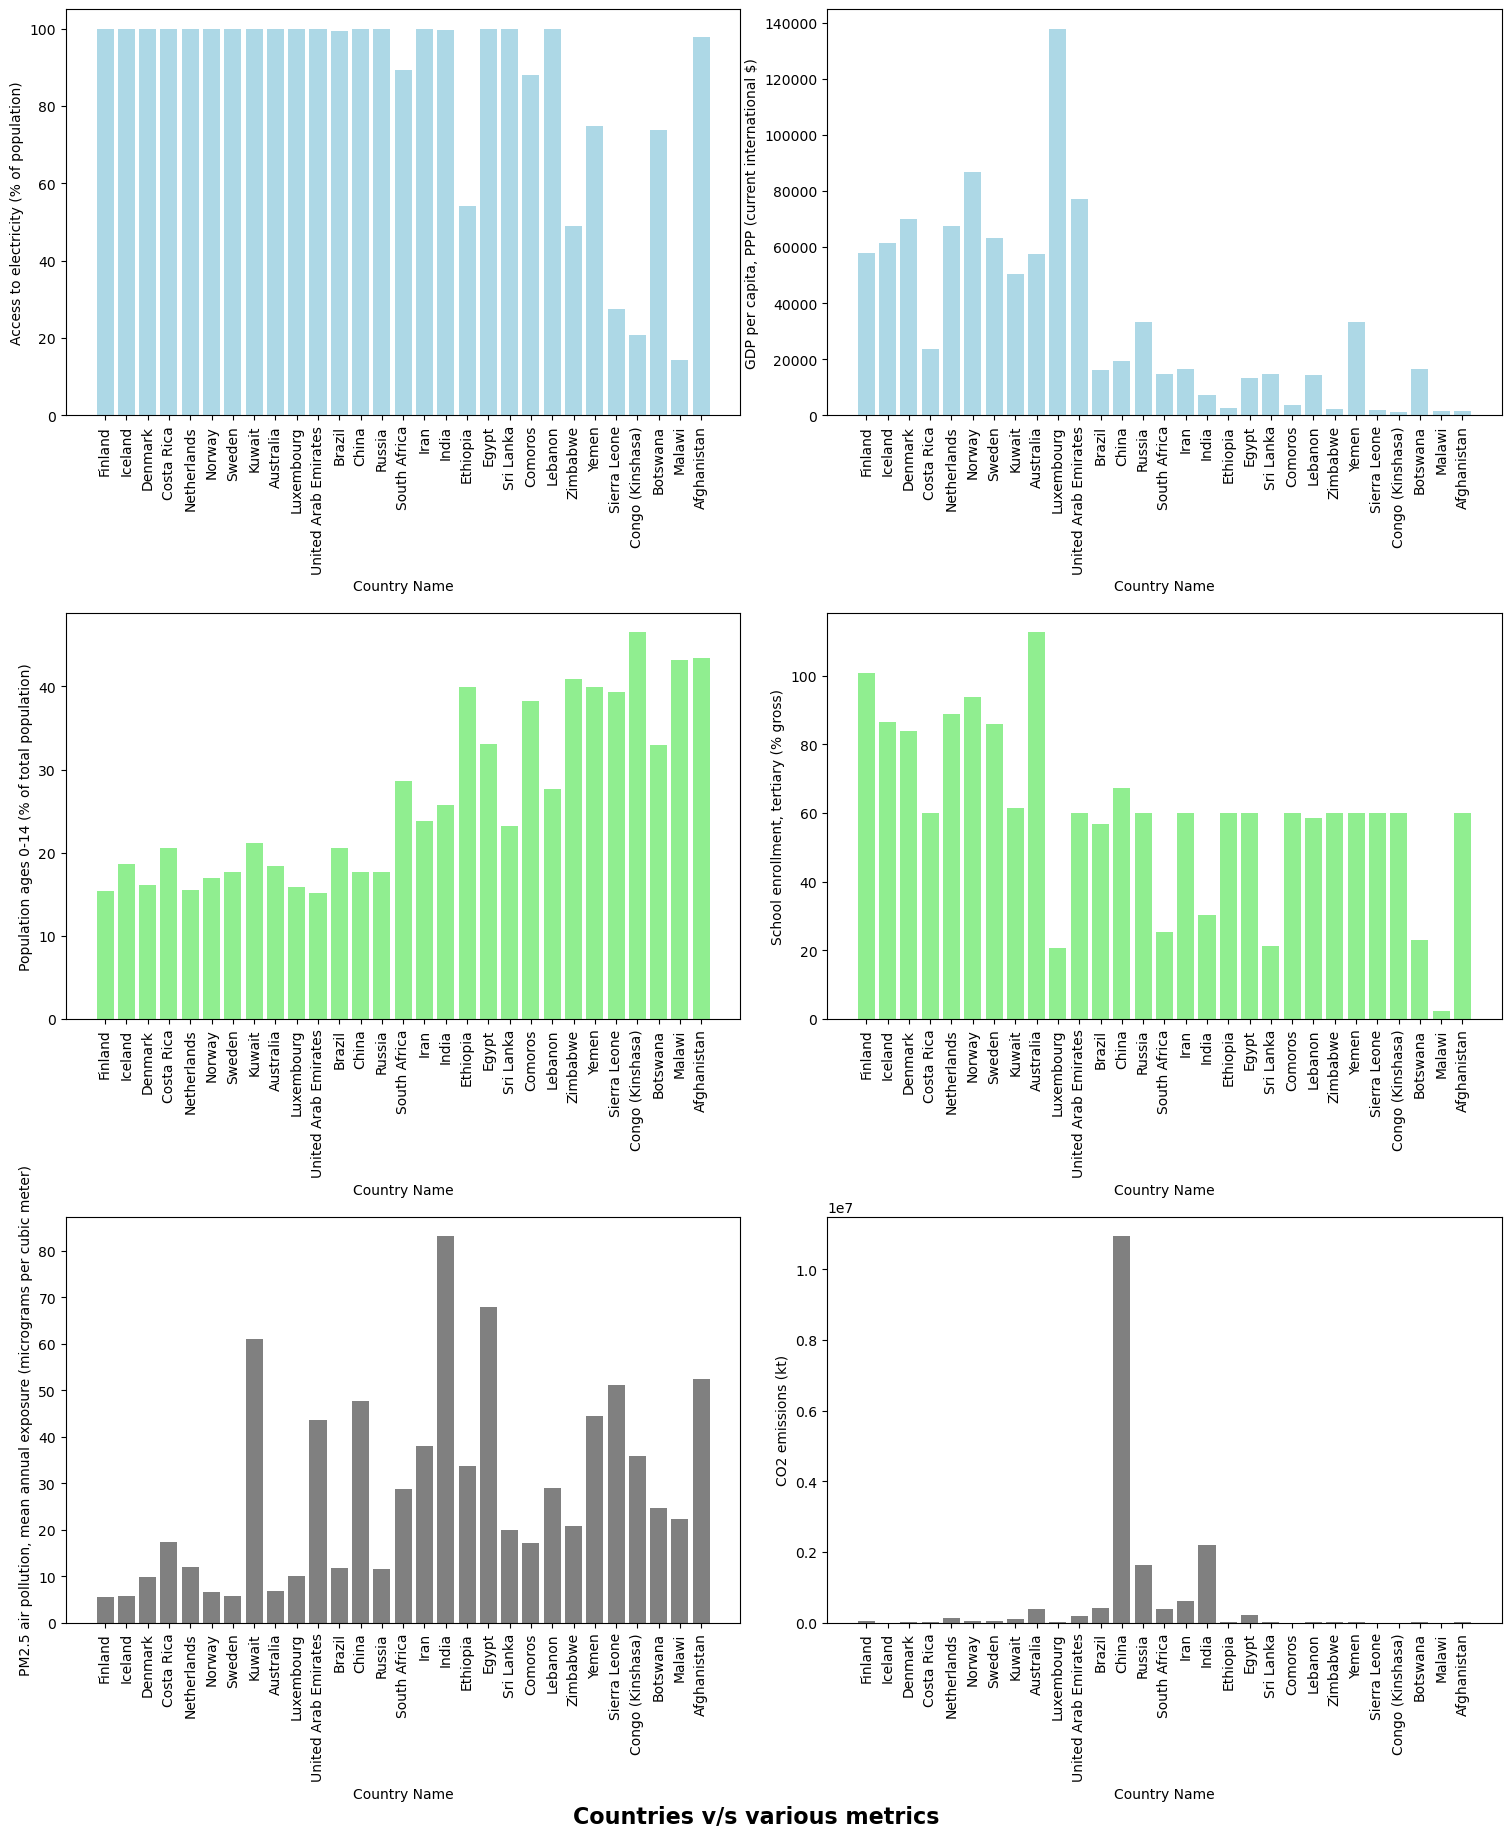

In [89]:
plt.figure(figsize=(15, 18))
plt.subplot(3, 2, 1)
plt.bar(wrld["Country name"], wrld["Access to electricity (% of population)"], color='lightblue')
plt.xticks(rotation = 90)
plt.xlabel('Country Name')
plt.ylabel('Access to electricity (% of population)')

plt.subplot(3, 2, 2)
plt.bar(wrld["Country name"], wrld["GDP per capita, PPP (current international $)"], color='lightblue')
plt.xticks(rotation = 90)
plt.xlabel('Country Name')
plt.ylabel('GDP per capita, PPP (current international $)')

plt.subplot(3, 2, 3)
plt.bar(wrld["Country name"], wrld["Population ages 0-14 (% of total population)"], color='lightgreen')
plt.xticks(rotation = 90)
plt.xlabel('Country Name')
plt.ylabel('Population ages 0-14 (% of total population)')

plt.subplot(3, 2, 4)
plt.bar(wrld["Country name"], wrld["School enrollment, tertiary (% gross)"], color='lightgreen')
plt.xticks(rotation = 90)
plt.xlabel('Country Name')
plt.ylabel('School enrollment, tertiary (% gross)')

plt.subplot(3, 2, 5)
plt.bar(wrld["Country name"], wrld["PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)"], color='grey')
plt.xticks(rotation = 90)
plt.xlabel('Country Name')
plt.ylabel('PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)')

plt.subplot(3, 2, 6)
plt.bar(wrld["Country name"], wrld["CO2 emissions (kt)"], color='grey')
plt.xticks(rotation = 90)
plt.xlabel('Country Name')
plt.ylabel('CO2 emissions (kt)')

plt.tight_layout(pad=0.3)
plt.suptitle("Countries v/s various metrics", y=0, fontweight ="bold", fontsize=16)
plt.show()

Text(0.5, 1.0, 'Scatter Plot between Score and Access to Electricity')

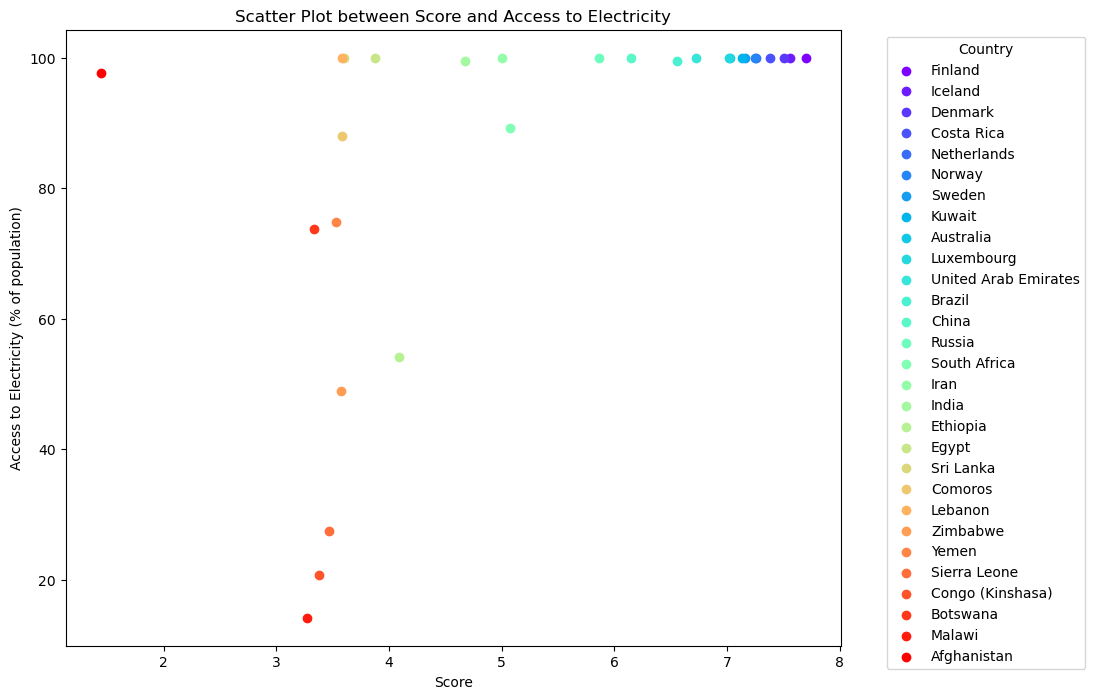

In [90]:
countries = wrld['Country name']

colors = plt.cm.rainbow([i/float(len(countries)-1) for i in range(len(countries))])

plt.figure(figsize=(10,8))
for i, country in enumerate(countries):
    plt.scatter(wrld[wrld['Country name'] == country]['Score'], wrld[wrld['Country name'] == country]['Access to electricity (% of population)'],
                color=colors[i], label=country)

plt.xlabel('Score')
plt.ylabel('Access to Electricity (% of population)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Scatter Plot between Score and Access to Electricity')

In [102]:
corr = wrld['Score'].corr(wrld['Access to electricity (% of population)'])
print('The correlation between Score and Access to electricity (% of population) is:', corr.round(2))

The correlation between Score and Access to electricity (% of population) is: 0.54


### Access to electricity has a moderate positive effect on the Score - higher the access to electricity, higher is the score.
### A nation with higher access to electricity tends to be happier.

Text(0.5, 1.0, 'Scatter Plot between Score and Access to GDP per capita, PPP (current international $)')

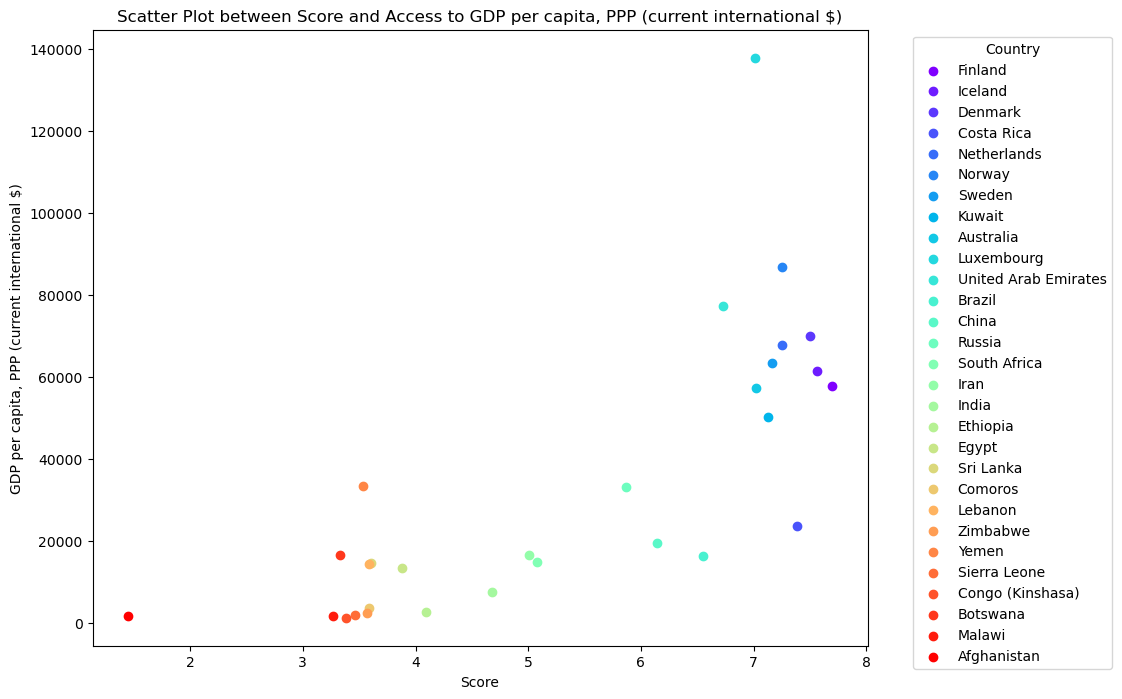

In [92]:
plt.figure(figsize=(10,8))
for i, country in enumerate(countries):
    plt.scatter(wrld[wrld['Country name'] == country]['Score'], wrld[wrld['Country name'] == country]['GDP per capita, PPP (current international $)'],
                color=colors[i], label=country)
plt.xlabel('Score')
plt.ylabel('GDP per capita, PPP (current international $)')


plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Scatter Plot between Score and Access to GDP per capita, PPP (current international $)')

In [103]:
corr = wrld['Score'].corr(wrld['GDP per capita, PPP (current international $)'])
print('The correlation between Score and GDP per capita, PPP (current international $) is:', corr.round(2))

The correlation between Score and GDP per capita, PPP (current international $) is: 0.75


### GDP per capita has a moderate positive effect on the Score - higher the GDP per capita, higher is the score.
### A wealthier nation tends to be happier.

Text(0.5, 1.0, 'Scatter Plot between Score and Population ages 0-14 (% of total population)')

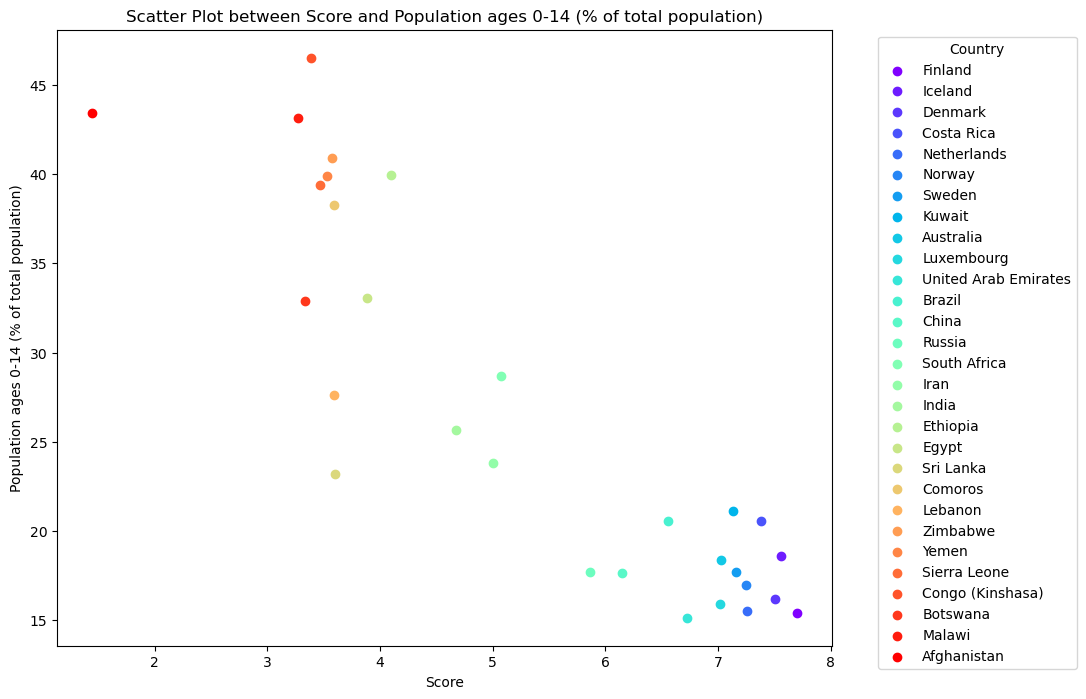

In [94]:
plt.figure(figsize=(10,8))
for i, country in enumerate(countries):
    plt.scatter(wrld[wrld['Country name'] == country]['Score'], wrld[wrld['Country name'] == country]['Population ages 0-14 (% of total population)'],
                color=colors[i], label=country)
plt.xlabel('Score')
plt.ylabel('Population ages 0-14 (% of total population)')

plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Scatter Plot between Score and Population ages 0-14 (% of total population)')

In [104]:
corr = wrld['Score'].corr(wrld['Population ages 0-14 (% of total population)'])
print('The correlation between Score and Population ages 0-14 (% of total population) is:', corr.round(2))

The correlation between Score and Population ages 0-14 (% of total population) is: -0.89


### Access to Electricity has a high negative effect on the Score - lower the number of people aged 0-14, higher is the score.
### A younger nation does not necessary imply a happier nation.

Text(0.5, 1.0, 'Scatter Plot between Score and School enrollment, tertiary (% gross)')

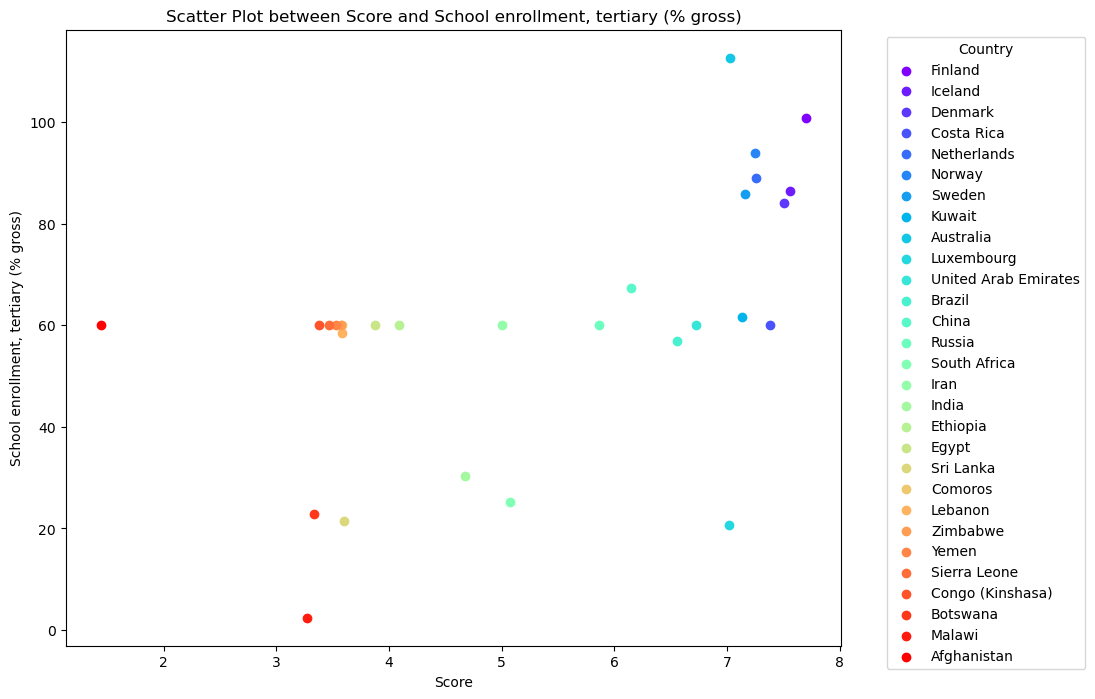

In [96]:
plt.figure(figsize=(10,8))
for i, country in enumerate(countries):
    plt.scatter(wrld[wrld['Country name'] == country]['Score'], wrld[wrld['Country name'] == country]['School enrollment, tertiary (% gross)'],
                color=colors[i], label=country)

plt.xlabel('Score')
plt.ylabel('School enrollment, tertiary (% gross)')

plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Scatter Plot between Score and School enrollment, tertiary (% gross)')

In [105]:
corr = wrld['Score'].corr(wrld['School enrollment, tertiary (% gross)'])
print('The correlation between Score and School enrollment, tertiary (% gross) is:', corr.round(2))

The correlation between Score and School enrollment, tertiary (% gross) is: 0.53


### Tertiary school enrollment has a moderate positive effect on the Score - higher the number of people enrolled in tertiary education, higher is the score.
### A nation with more people in the traditional education system tends to be happier.

Text(0.5, 1.0, 'Scatter Plot between Score and PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)')

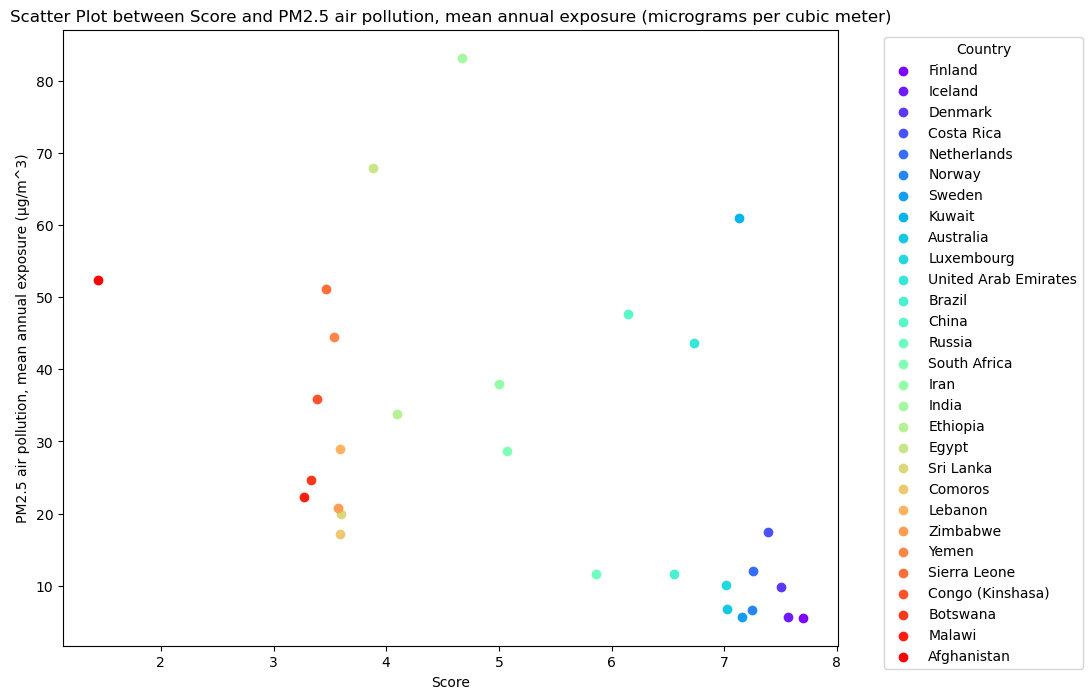

In [98]:
plt.figure(figsize=(10,8))
for i, country in enumerate(countries):
    plt.scatter(wrld[wrld['Country name'] == country]['Score'], wrld[wrld['Country name'] == country]['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'],
                color=colors[i], label=country)
plt.xlabel('Score')
plt.ylabel('PM2.5 air pollution, mean annual exposure (μg/m^3)')

plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Scatter Plot between Score and PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)')

In [106]:
corr = wrld['Score'].corr(wrld['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'])
print('The correlation between Score and PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) is:', corr.round(2))

The correlation between Score and PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) is: -0.47


### PM2.5 Air Pollution has a moderate negative effect on the Score - higher the PM2.5 levels, lower is the score.
### A nation with lower levels of air pollution tends to be happier.

Text(0.5, 1.0, 'Scatter Plot between Score and CO2 emmissions (kt)')

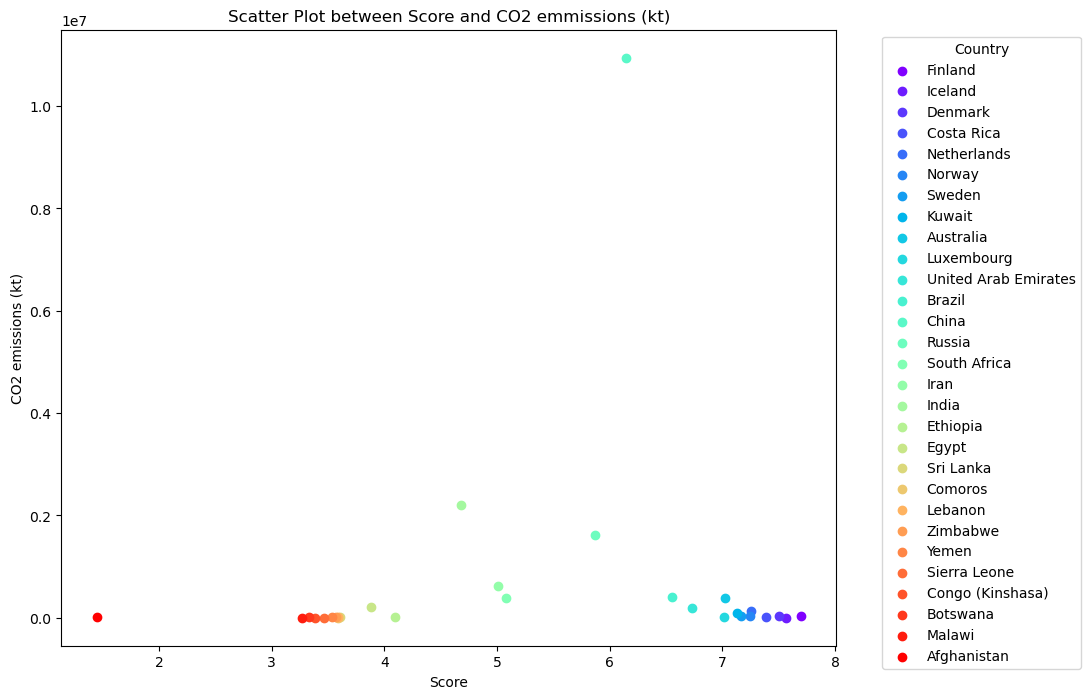

In [100]:
plt.figure(figsize=(10,8))
for i, country in enumerate(countries):
    plt.scatter(wrld[wrld['Country name'] == country]['Score'], wrld[wrld['Country name'] == country]["CO2 emissions (kt)"],
                color=colors[i], label=country)
plt.xlabel('Score')
plt.ylabel('CO2 emissions (kt)')

plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Scatter Plot between Score and CO2 emmissions (kt)')

In [107]:
corr = wrld['Score'].corr(wrld['CO2 emissions (kt)'])
print('The correlation between Score and CO2 emissions (kt) is:', corr.round(2))

The correlation between Score and CO2 emissions (kt) is: 0.1


### CO2 Emissions have almost no effect on the Score.

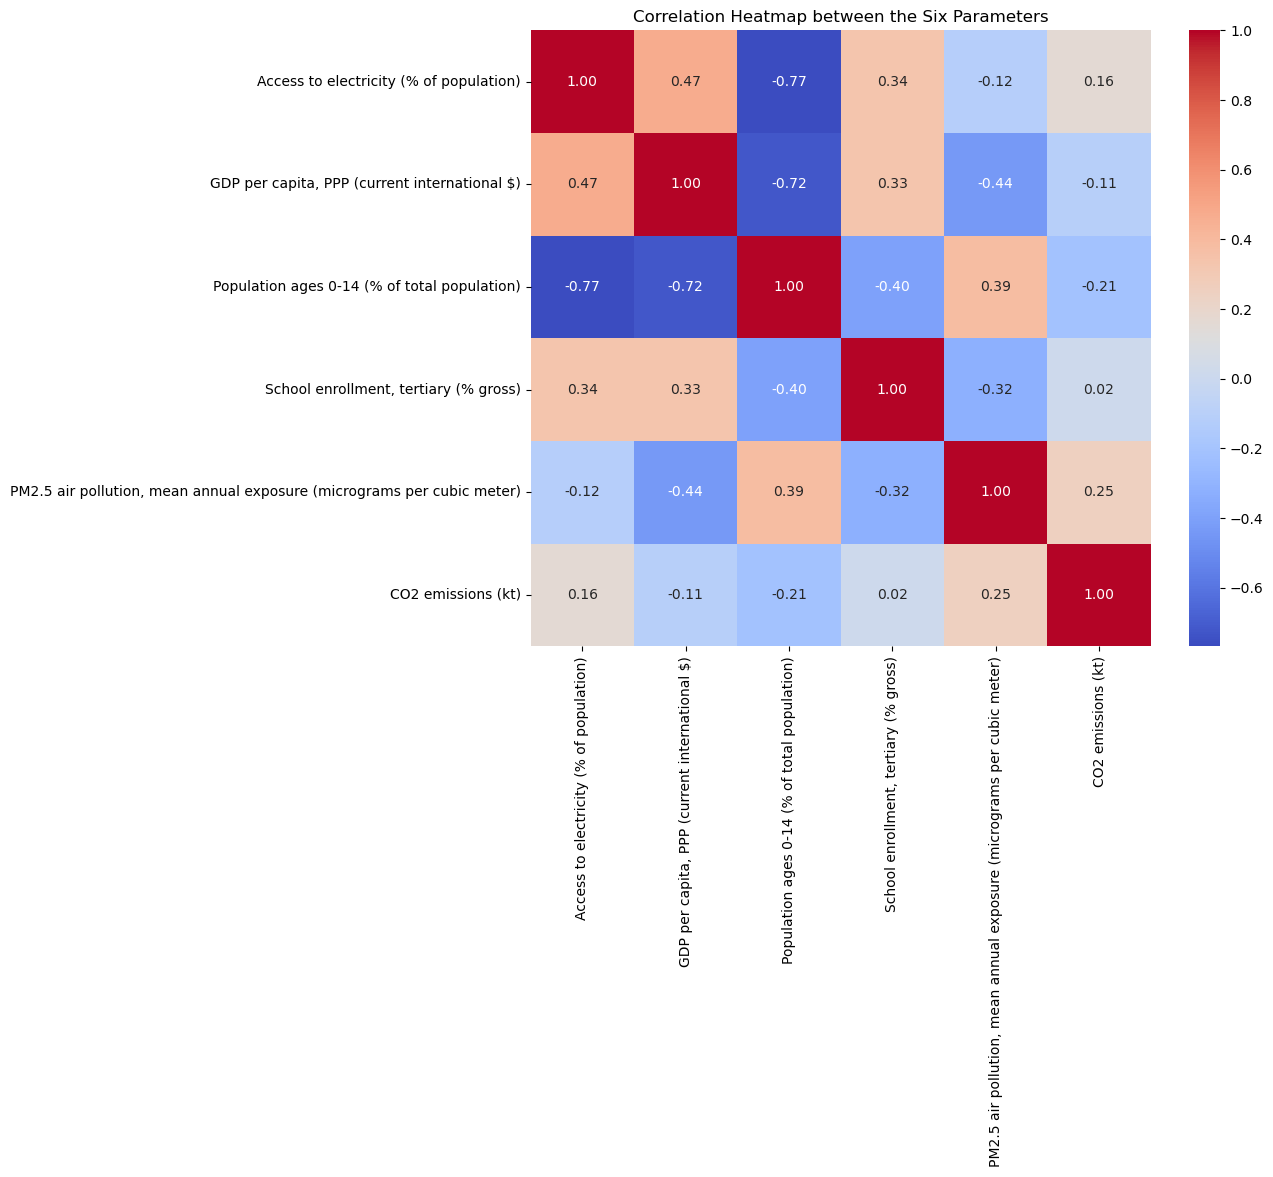

In [124]:
corr_df = wrld.drop(["Score", "Country name"],axis=1)

corr_matrix = corr_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap between the Six Parameters')

plt.show()

## Conclusion:

Five of the six parameters successfully showed an impact on the Happiness Score. 
As a result, we could say that humans tend to be <b>happier when they are wealthier, healthier and more educated.</b>

Furthermore, these parameters have correlations among themselves as demonstrated in the heatmap above.